In [534]:
#Import libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as pl
import csv

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')

# loading data
df_maintenance = pd.read_csv ('http://aws-proserve-data-science.s3.amazonaws.com/predictive_maintenance.csv')
# print head
df_maintenance.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [535]:
#print (df)
df_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [536]:
#  we do not need date and device columns and will be droped
df_maintenance.drop(['date','device'],axis=1, inplace=True)
df_maintenance.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,0,215630672,56,0,52,6,407438,0,0,7
1,0,61370680,0,3,0,6,403174,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3


In [537]:
failure_counts = df_maintenance['failure'].value_counts()
failure_counts

0    124388
1       106
Name: failure, dtype: int64

let’s do some more exploration and see which variables are good predictors

In [538]:
df_maintenance.groupby('failure').mean()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,,,,,,,,,
0,1.223840e+08,156.118725,9.945598,1.696048,14.221613,260174.250587,0.266682,0.266682,12.442462
1,1.271755e+08,4109.433962,3.905660,54.632075,15.462264,258303.481132,30.622642,30.622642,23.084906


Observations:
Except for metric 1,3, 5 and 6 all other metrics have higher value for failure (1) than Non failure (0). metric 3 has higher value for Non failure than failure. It seems that metrics 2,3,4,7,8 and 9 are good predictors of failure. But I will use all the variables to develop the model.

In [539]:
# Let's see the dtypes
df_maintenance.dtypes

failure    int64
metric1    int64
metric2    int64
metric3    int64
metric4    int64
metric5    int64
metric6    int64
metric7    int64
metric8    int64
metric9    int64
dtype: object

In [540]:
# we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:
feature_df = df_maintenance[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9','failure']]
feature_df['failure'] = feature_df['failure'].astype('int')
feature_df.head()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
0,215630672,56,0,52,6,407438,0,0,7,0
1,61370680,0,3,0,6,403174,0,0,0,0
2,173295968,0,0,0,12,237394,0,0,0,0
3,79694024,0,0,0,6,410186,0,0,0,0
4,135970480,0,0,0,15,313173,0,0,3,0


In [541]:
# Lets define X, and y for our dataset:
feature_df = df_maintenance[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']]
X = np.asarray(feature_df)
X[0:5]

y = np.asarray(df_maintenance['failure'])
y [0:5]

# Also lets normalized the data set
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.32, -0.05, -0.05,  2.19, -0.52,  1.49, -0.04, -0.04, -0.03],
       [-0.87, -0.07, -0.04, -0.08, -0.52,  1.44, -0.04, -0.04, -0.07],
       [ 0.72, -0.07, -0.05, -0.08, -0.14, -0.23, -0.04, -0.04, -0.07],
       [-0.61, -0.07, -0.05, -0.08, -0.52,  1.51, -0.04, -0.04, -0.07],
       [ 0.19, -0.07, -0.05, -0.08,  0.05,  0.53, -0.04, -0.04, -0.05]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [542]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (99595, 9) (99595,)
Test set: (24899, 9) (24899,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [543]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Now we can predict using our test set:

In [544]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X)

In [545]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.99e-01, 7.56e-04],
       [9.99e-01, 8.55e-04],
       [1.00e+00, 3.55e-04],
       ...,
       [9.99e-01, 8.40e-04],
       [9.99e-01, 8.90e-04],
       [9.99e-01, 8.16e-04]])

## Evaluation

### Cross Validation

The following code basically runs an 5-fold cross validation method and
calculates the accuracy for each of the iterations. The average accuracy is also printed. If the accuracy of the model doesn’t vary much and the average accuracy remains closer to the accuracy numbers calculated for the model before, then it can be confirmed that the model generalizes well.



In [546]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y,
scoring='accuracy', cv=5)
print (scores)
scores.mean()

[1. 1. 1. 1. 1.]


0.9990119998031121

### Confusion matrix
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [547]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[24881     0]
 [   18     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

   micro avg       1.00      1.00      1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899

Confusion matrix, without normalization
[[24881     0]
 [   18     0]]


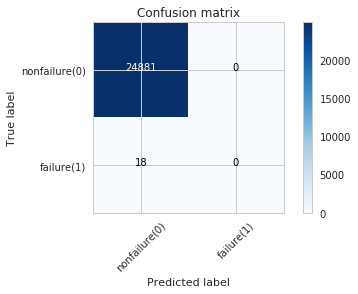

In [548]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonfailure(0)','failure(1)'],normalize= False,  title='Confusion matrix')

let's see the first row. The first row is for devices whose actual failure value in test set is 0( Non failure). Out of 24899 devices, the failure value of 24881 of them is 0. And out of these 24881 , the classifier correctly predicted 24881 of them as 0 and Non has been falsely classified as 1 (False Positive or  Type I error). So, the model has done a very good job in predicting all the devises with non failure (value 0). this can help to save a lot of resources which could have been allocated for preventive maintenance.

In the second raw, it looks like in the test set there were 18 devices whos failure value were 1.The classifier wrongly predicted 18 of them as 0 (False Negative or Type II error) , and none of them as 1. that means the Model wrongly pridicted only 18 devices as having non failure while they have failure. which is not good. We can consider it as error of the model for second row.

Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the __F1-score__ for both labels, which is 1.0 in our case.



### F1 Score

In [549]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, yhat, average='weighted')
print("F1 score is", F1)

F1 score is 0.9989157498019602


### Jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [550]:
from sklearn.metrics import jaccard_similarity_score
jaccard = jaccard_similarity_score(y_test, yhat)
print("Jaccard score is", jaccard)

Jaccard score is 0.9992770794007791


### Receiver operating characteristic (ROC) curve

The Receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

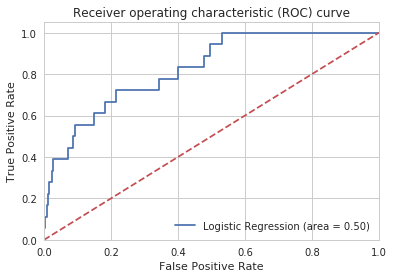

In [551]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Thank you.